In [1]:
import os
import pandas as pd


diretorio_quero = r'INMET/'
arquivos = os.listdir(diretorio_quero)
print(arquivos)

#arquivo
arq_nc = [arq for arq in arquivos if 'Cuiaba' in arq]
print(arq_nc)

['Cuiabadados_83361_D_1910-12-31_2024-06-28.csv']
['Cuiabadados_83361_D_1910-12-31_2024-06-28.csv']


In [2]:
#ler = pd.read_csv(os.path.join(diretorio_quero,arq_nc[0]), skiprows = 12)

In [3]:
diretorio_quero2 = r'INMET/Cuiabadados_83361_D_1910-12-31_2024-06-28.csv'


In [4]:
ler = pd.read_csv(diretorio_quero2, skiprows = 9, sep=';', decimal=',')
display(ler)

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)",Unnamed: 2
0,1961-01-01,NaN,NaN
1,1961-01-02,0.0,NaN
2,1961-01-03,4.1,NaN
3,1961-01-04,14.8,NaN
4,1961-01-05,1.3,NaN
...,...,...,...
23185,2024-06-24,0.0,NaN
23186,2024-06-25,0.0,NaN
23187,2024-06-26,0.0,NaN
23188,2024-06-27,0.0,NaN


In [5]:
ler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23190 entries, 0 to 23189
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Data Medicao                    23190 non-null  object 
 1   PRECIPITACAO TOTAL, DIARIO(mm)  22384 non-null  float64
 2   Unnamed: 2                      0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 543.6+ KB


In [6]:
from datetime import datetime
# Convertendo a coluna 'Data Medicao' para datetime
ler['Data Medicao'] = pd.to_datetime(ler['Data Medicao'], format="%Y-%m-%d")

In [7]:
ler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23190 entries, 0 to 23189
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Data Medicao                    23190 non-null  datetime64[ns]
 1   PRECIPITACAO TOTAL, DIARIO(mm)  22384 non-null  float64       
 2   Unnamed: 2                      0 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 543.6 KB


In [8]:
ler.columns

Index(['Data Medicao', 'PRECIPITACAO TOTAL, DIARIO(mm)', 'Unnamed: 2'], dtype='object')

In [9]:
ler=pd.DataFrame(ler.rename(columns ={'Data Medicao':'data', 'PRECIPITACAO TOTAL, DIARIO(mm)':'chuva diaria(mm)'}))
ler= ler[['data' ,'chuva diaria(mm)']]
ler['ano']= ler['data'].dt.year
display(ler)



,data,chuva diaria(mm),ano
0,1961-01-01,NaN,1961
1,1961-01-02,0.0,1961
2,1961-01-03,4.1,1961
3,1961-01-04,14.8,1961
4,1961-01-05,1.3,1961
...,...,...,...
23185,2024-06-24,0.0,2024
23186,2024-06-25,0.0,2024
23187,2024-06-26,0.0,2024
23188,2024-06-27,0.0,2024


In [10]:
#analisar os dados por completo
def is_leap_year(year):
    #print("Verifica se um ano é bissexto.")
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

def days_in_year(year):
    #print("Retorna o número de dias em um ano específico.")
    return 366 if is_leap_year(year) else 365




In [11]:
null_counts_res = ler.isnull().sum()
print('verificar se tem dias sem dados, neste caso não')
print(null_counts_res)

verificar se tem dias sem dados, neste caso não
data                  0
chuva diaria(mm)    806
ano                   0
dtype: int64


### base para filtrar os dados, e retirar o ano que não tem todos os dados diários

In [12]:
#deletar a linha toda que tem NaN
#axis = 0 são dados de linha, e o axis= 1 é de coluna
ler_deletado_nan=ler.dropna(axis=0, how='any')
ler_deletado_nan=ler_deletado_nan.reset_index()
display(ler_deletado_nan)


,index,data,chuva diaria(mm),ano
0,1,1961-01-02,0.0,1961
1,2,1961-01-03,4.1,1961
2,3,1961-01-04,14.8,1961
3,4,1961-01-05,1.3,1961
4,5,1961-01-06,1.5,1961
...,...,...,...,...
22379,23185,2024-06-24,0.0,2024
22380,23186,2024-06-25,0.0,2024
22381,23187,2024-06-26,0.0,2024
22382,23188,2024-06-27,0.0,2024


In [13]:
ler_deletado_nan['dias'] = ler_deletado_nan.groupby(['ano'])['ano'].transform('count')

In [14]:
ler_deletado_nan

,index,data,chuva diaria(mm),ano,dias
0,1,1961-01-02,0.0,1961,364
1,2,1961-01-03,4.1,1961,364
2,3,1961-01-04,14.8,1961,364
3,4,1961-01-05,1.3,1961,364
4,5,1961-01-06,1.5,1961,364
...,...,...,...,...,...
22379,23185,2024-06-24,0.0,2024,178
22380,23186,2024-06-25,0.0,2024,178
22381,23187,2024-06-26,0.0,2024,178
22382,23188,2024-06-27,0.0,2024,178


In [15]:
ler_deletado_nan['Dias_que_deve_Ter']= [days_in_year(ano) for ano in ler_deletado_nan['ano']]


In [16]:
ler_deletado_nan

,index,data,chuva diaria(mm),ano,dias,Dias_que_deve_Ter
0,1,1961-01-02,0.0,1961,364,365
1,2,1961-01-03,4.1,1961,364,365
2,3,1961-01-04,14.8,1961,364,365
3,4,1961-01-05,1.3,1961,364,365
4,5,1961-01-06,1.5,1961,364,365
...,...,...,...,...,...,...
22379,23185,2024-06-24,0.0,2024,178,366
22380,23186,2024-06-25,0.0,2024,178,366
22381,23187,2024-06-26,0.0,2024,178,366
22382,23188,2024-06-27,0.0,2024,178,366


https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

In [17]:

Max_anual_novo_deletado = pd.DataFrame(ler_deletado_nan.groupby(['ano','Dias_que_deve_Ter']).agg({'chuva diaria(mm)':'max','dias':'max'}))
Max_anual_novo_deletado= Max_anual_novo_deletado.reset_index()
display(Max_anual_novo_deletado)


,ano,Dias_que_deve_Ter,chuva diaria(mm),dias
0,1961,365,71.3,364
1,1962,365,75.8,365
2,1963,365,102.5,365
3,1964,366,107.0,365
4,1965,365,99.5,365
...,...,...,...,...
59,2020,366,53.2,353
60,2021,365,55.8,361
61,2022,365,115.2,363
62,2023,365,70.2,362


In [18]:
ano_para_remover=[]
for n, dias in enumerate(Max_anual_novo_deletado['dias']):
    if dias != Max_anual_novo_deletado['Dias_que_deve_Ter'][n]:
            print('ano remover')
            print(Max_anual_novo_deletado['ano'][n])
            ano_para_remover.append(Max_anual_novo_deletado['ano'][n])
            
            
print('saber quais anos devo remover, pois não obedeceu a regra para a análise')
print(ano_para_remover)

ano remover
1961
ano remover
1964
ano remover
1967
ano remover
1975
ano remover
1978
ano remover
1990
ano remover
1991
ano remover
1992
ano remover
1993
ano remover
1994
ano remover
1995
ano remover
1996
ano remover
1997
ano remover
1998
ano remover
1999
ano remover
2000
ano remover
2001
ano remover
2002
ano remover
2003
ano remover
2005
ano remover
2006
ano remover
2008
ano remover
2009
ano remover
2010
ano remover
2013
ano remover
2014
ano remover
2015
ano remover
2016
ano remover
2017
ano remover
2018
ano remover
2019
ano remover
2020
ano remover
2021
ano remover
2022
ano remover
2023
ano remover
2024
saber quais anos devo remover, pois não obedeceu a regra para a análise
[1961, 1964, 1967, 1975, 1978, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2005, 2006, 2008, 2009, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [19]:
              
#--------------------removendo----------------------


for n, ano_u in enumerate(Max_anual_novo_deletado['ano']):
  #  print(n, ano_u)
    for ano_deleta in ano_para_remover:
        #print(ano_deleta, ano_u)
        if ano_u == ano_deleta :
            print(ano_u,ano_deleta)
            indices_to_remove = Max_anual_novo_deletado[Max_anual_novo_deletado['ano'] == Max_anual_novo_deletado['ano'][n]].index
            print(indices_to_remove, ano_u)
            # Usando .loc para remover as linhas
            Max_anual_novo_deletado = Max_anual_novo_deletado.drop(indices_to_remove)
display(Max_anual_novo_deletado)
                

1961 1961
Index([0], dtype='int64') 1961
1964 1964
Index([3], dtype='int64') 1964
1967 1967
Index([6], dtype='int64') 1967
1975 1975
Index([14], dtype='int64') 1975
1978 1978
Index([17], dtype='int64') 1978
1990 1990
Index([29], dtype='int64') 1990
1991 1991
Index([30], dtype='int64') 1991
1992 1992
Index([31], dtype='int64') 1992
1993 1993
Index([32], dtype='int64') 1993
1994 1994
Index([33], dtype='int64') 1994
1995 1995
Index([34], dtype='int64') 1995
1996 1996
Index([35], dtype='int64') 1996
1997 1997
Index([36], dtype='int64') 1997
1998 1998
Index([37], dtype='int64') 1998
1999 1999
Index([38], dtype='int64') 1999
2000 2000
Index([39], dtype='int64') 2000
2001 2001
Index([40], dtype='int64') 2001
2002 2002
Index([41], dtype='int64') 2002
2003 2003
Index([42], dtype='int64') 2003
2005 2005
Index([44], dtype='int64') 2005
2006 2006
Index([45], dtype='int64') 2006
2008 2008
Index([47], dtype='int64') 2008
2009 2009
Index([48], dtype='int64') 2009
2010 2010
Index([49], dtype='int64') 

,ano,Dias_que_deve_Ter,chuva diaria(mm),dias
1,1962,365,75.8,365
2,1963,365,102.5,365
4,1965,365,99.5,365
5,1966,365,124.6,365
7,1968,366,99.7,366
8,1969,365,76.5,365
9,1970,365,115.1,365
10,1971,365,68.8,365
11,1972,366,112.7,366
12,1973,365,62.5,365


In [20]:
len(Max_anual_novo_deletado)

28

In [21]:
Max_anual_novo_deletado=Max_anual_novo_deletado[['ano', 'chuva diaria(mm)']]
display(Max_anual_novo_deletado)

,ano,chuva diaria(mm)
1,1962,75.8
2,1963,102.5
4,1965,99.5
5,1966,124.6
7,1968,99.7
8,1969,76.5
9,1970,115.1
10,1971,68.8
11,1972,112.7
12,1973,62.5


<Axes: >

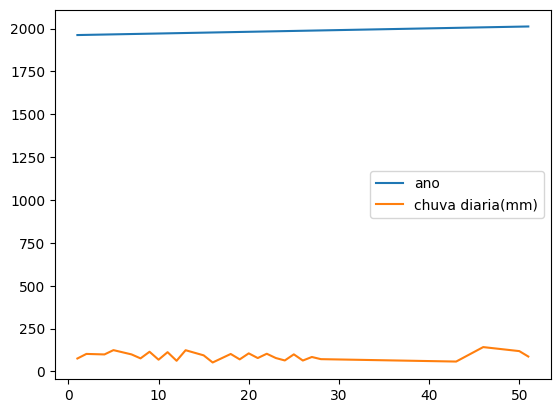

In [22]:
import matplotlib.pyplot as plt

Max_anual_novo_deletado.plot()

In [23]:
#!pip install matplotlib

<Axes: >

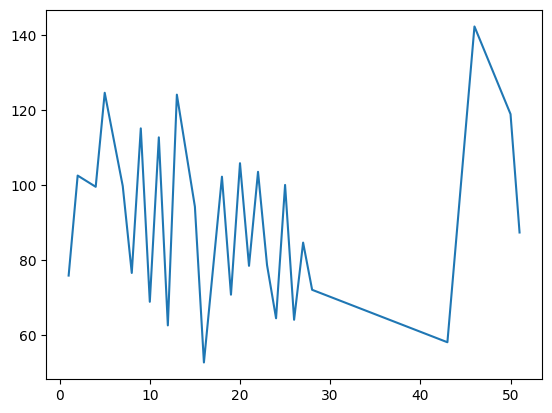

In [24]:
Max_anual_novo_deletado['chuva diaria(mm)'].plot()

<Axes: >

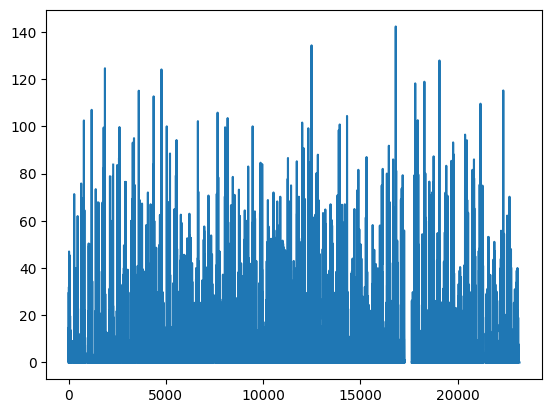

In [25]:
ler['chuva diaria(mm)'].plot()

#https://www.hashtagtreinamentos.com/saia-do-zero-em-graficos-no-python?gad_source=1&gclid=EAIaIQobChMI-NCR4Yb_hgMVnWBIAB03jgDuEAAYAyAAEgIPI_D_BwE

#https://www.datacamp.com/cheat-sheet/matplotlib-cheat-sheet-plotting-in-python?utm_source=google&utm_medium=paid_search&utm_campaignid=21374847033&utm_adgroupid=165153432642&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=703052951184&utm_targetid=dsa-2219652735736&utm_loc_interest_ms=&utm_loc_physical_ms=9196588&utm_content=DSA~blog~Python&utm_campaign=240617_1-sea~dsa~tofu_2-b2c_3-ptbr-lang-en_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-june24&gad_source=1&gclid=EAIaIQobChMI-NCR4Yb_hgMVnWBIAB03jgDuEAAYASAAEgIpcPD_BwE

# base cálculo IDF

In [26]:
lista= ['media','desvio_padrao', 'alfa','X0']

In [27]:
parametros_anos = pd.DataFrame({'Variaveis': lista})


In [28]:
parametros_anos

,Variaveis
0,media
1,desvio_padrao
2,alfa
3,X0


In [29]:
zerado_0= Max_anual_novo_deletado.rename(columns={'chuva diaria(mm)': 'Pmax(mm)' })


In [30]:
#zerado_0
#zerado_0=zerado_0[['ano', 'Pmax(mm)']]
display(zerado_0)

,ano,Pmax(mm)
1,1962,75.8
2,1963,102.5
4,1965,99.5
5,1966,124.6
7,1968,99.7
8,1969,76.5
9,1970,115.1
10,1971,68.8
11,1972,112.7
12,1973,62.5


https://abrh.s3.sa-east-1.amazonaws.com/Sumarios/43/34e99d7551a5aaecf5b749f18958b39b_0a179ab0c091f38d3ad6837481371661.pdf

In [31]:
# #10min  10/30 30min/1h 1h/24
zerado_0['10min'] = zerado_0['Pmax(mm)']*0.54*0.74*0.42



#30min 30min/1h 1h/24
zerado_0['30min'] = zerado_0['Pmax(mm)']*0.74*0.42

#1h
zerado_0['1h'] = zerado_0['Pmax(mm)']*0.42

In [32]:

#6h
zerado_0['6h'] = zerado_0['Pmax(mm)']*0.72


#8h
zerado_0['8h'] = zerado_0['Pmax(mm)']*0.78

#10h
zerado_0['10h'] = zerado_0['Pmax(mm)']*0.82

#12h
zerado_0['12h'] = zerado_0['Pmax(mm)']*0.85






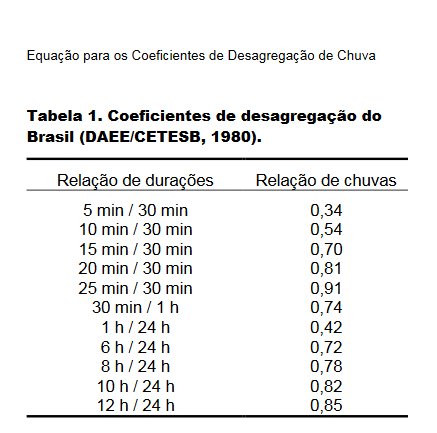

In [33]:
display(zerado_0)

,ano,Pmax(mm),10min,30min,1h,6h,8h,10h,12h
1,1962,75.8,12.721666,23.55864,31.836,54.576,59.124,62.156,64.430
2,1963,102.5,17.202780,31.85700,43.050,73.800,79.950,84.050,87.125
4,1965,99.5,16.699284,30.92460,41.790,71.640,77.610,81.590,84.575
5,1966,124.6,20.911867,38.72568,52.332,89.712,97.188,102.172,105.910
7,1968,99.7,16.732850,30.98676,41.874,71.784,77.766,81.754,84.745
8,1969,76.5,12.839148,23.77620,32.130,55.080,59.670,62.730,65.025
9,1970,115.1,19.317463,35.77308,48.342,82.872,89.778,94.382,97.835
10,1971,68.8,11.546842,21.38304,28.896,49.536,53.664,56.416,58.480
11,1972,112.7,18.914666,35.02716,47.334,81.144,87.906,92.414,95.795
12,1973,62.5,10.489500,19.42500,26.250,45.000,48.750,51.250,53.125


In [34]:
lista_basedf=list(zerado_0.columns)
print(lista_basedf)

['ano', 'Pmax(mm)', '10min', '30min', '1h', '6h', '8h', '10h', '12h']


In [35]:
parametros_anos

,Variaveis
0,media
1,desvio_padrao
2,alfa
3,X0


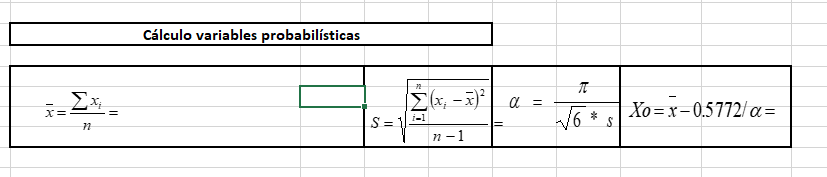

In [36]:
for coluna in lista_basedf:
    if not coluna == 'ano' and not coluna == 'Pmax(mm)':
        parametros_anos[coluna]=0
        
parametros_anos   

,Variaveis,10min,30min,1h,6h,8h,10h,12h
0,media,0,0,0,0,0,0,0
1,desvio_padrao,0,0,0,0,0,0,0
2,alfa,0,0,0,0,0,0,0
3,X0,0,0,0,0,0,0,0


In [37]:
import math

for coluna in lista_basedf:
    if not coluna == 'ano' and not coluna == 'Pmax(mm)':

        print(coluna)
        #media
        media= zerado_0[coluna].mean()
        parametros_anos[coluna][0]=media
        #desvio padrao
        parametros_anos[coluna][1]=zerado_0[coluna].std()
        #alpha
        alpha= math.pi / (math.sqrt(6) * (zerado_0[coluna].std()))

        parametros_anos[coluna][2]= alpha
        #x0
        parametros_anos[coluna][3]= media-(0.5772/alpha)


parametros_anos

10min
30min
1h
6h
8h
10h
12h


/tmp/ipykernel_11737/1307519661.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  parametros_anos[coluna][0]=media
/tmp/ipykernel_11737/1307519661.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,Variaveis,10min,30min,1h,6h,8h,10h,12h
0,media,15.220564,28.186230,38.089500,65.296286,70.737643,74.365214,77.085893
1,desvio_padrao,3.881641,7.188224,9.713817,16.652257,18.039945,18.965071,19.658915
2,alfa,0.330414,0.178424,0.132034,0.077020,0.071095,0.067627,0.065240
3,X0,13.473667,24.951234,33.717884,57.802087,62.618928,65.830155,68.238575


In [38]:
zerado_0

,ano,Pmax(mm),10min,30min,1h,6h,8h,10h,12h
1,1962,75.8,12.721666,23.55864,31.836,54.576,59.124,62.156,64.430
2,1963,102.5,17.202780,31.85700,43.050,73.800,79.950,84.050,87.125
4,1965,99.5,16.699284,30.92460,41.790,71.640,77.610,81.590,84.575
5,1966,124.6,20.911867,38.72568,52.332,89.712,97.188,102.172,105.910
7,1968,99.7,16.732850,30.98676,41.874,71.784,77.766,81.754,84.745
8,1969,76.5,12.839148,23.77620,32.130,55.080,59.670,62.730,65.025
9,1970,115.1,19.317463,35.77308,48.342,82.872,89.778,94.382,97.835
10,1971,68.8,11.546842,21.38304,28.896,49.536,53.664,56.416,58.480
11,1972,112.7,18.914666,35.02716,47.334,81.144,87.906,92.414,95.795
12,1973,62.5,10.489500,19.42500,26.250,45.000,48.750,51.250,53.125


# calcular o período de Retorno

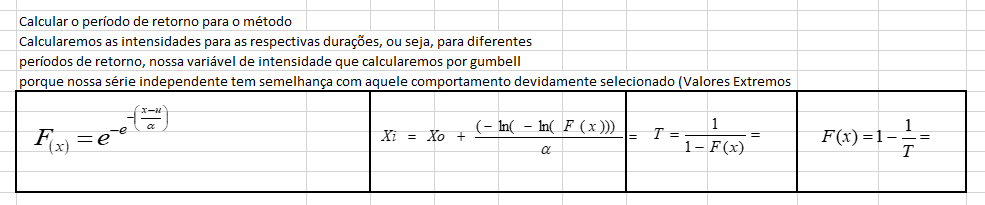

In [39]:
lista_periodo_retorno =[
2,5,10,25,50,100,500,1000,10000
]

In [40]:
parametros_anos

,Variaveis,10min,30min,1h,6h,8h,10h,12h
0,media,15.220564,28.186230,38.089500,65.296286,70.737643,74.365214,77.085893
1,desvio_padrao,3.881641,7.188224,9.713817,16.652257,18.039945,18.965071,19.658915
2,alfa,0.330414,0.178424,0.132034,0.077020,0.071095,0.067627,0.065240
3,X0,13.473667,24.951234,33.717884,57.802087,62.618928,65.830155,68.238575


In [41]:
linha_y= 4
for linha in lista_periodo_retorno:
    print(linha)
    parametros_anos.loc[linha_y, 'Variaveis'] = linha
    linha_y = linha_y + 1

2
5
10
25
50
100
500
1000
10000


In [42]:
parametros_anos

,Variaveis,10min,30min,1h,6h,8h,10h,12h
0,media,15.220564,28.186230,38.089500,65.296286,70.737643,74.365214,77.085893
1,desvio_padrao,3.881641,7.188224,9.713817,16.652257,18.039945,18.965071,19.658915
2,alfa,0.330414,0.178424,0.132034,0.077020,0.071095,0.067627,0.065240
3,X0,13.473667,24.951234,33.717884,57.802087,62.618928,65.830155,68.238575
4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
Ind_parametros_ = parametros_anos.set_index('Variaveis')
display(Ind_parametros_)

,10min,30min,1h,6h,8h,10h,12h
Variaveis,,,,,,,
media,15.220564,28.186230,38.089500,65.296286,70.737643,74.365214,77.085893
desvio_padrao,3.881641,7.188224,9.713817,16.652257,18.039945,18.965071,19.658915
alfa,0.330414,0.178424,0.132034,0.077020,0.071095,0.067627,0.065240
X0,13.473667,24.951234,33.717884,57.802087,62.618928,65.830155,68.238575
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
print(lista_basedf)
print(lista_periodo_retorno)

['ano', 'Pmax(mm)', '10min', '30min', '1h', '6h', '8h', '10h', '12h']
[2, 5, 10, 25, 50, 100, 500, 1000, 10000]


In [45]:
import math
from numpy import log as ln


for coluna in lista_basedf:
    if not coluna == 'ano' and not coluna == 'Pmax(mm)':
        print(coluna)
        for Tempo in lista_periodo_retorno:            
            if not Tempo == 1:
                fx = 1 - 1/Tempo
               # print(Tempo,fx)
                #print(Ind_parametros_45anos[coluna][Tempo])
                #dataframe['Coluna que desejo']['index']
                xo = Ind_parametros_[coluna]['X0']
                alpha = Ind_parametros_[coluna]['alfa']
                resultado = xo +(-1*ln(-1*ln(fx))/alpha)
                print('tabela',Tempo,fx, resultado)
                #fx > 0 tem que ser maior que zero para funcionar
                #resultado = xo+ (-math.log((-math.log(fx))))/alpha
                #Ind_parametros_45anos[coluna][Indice]
                Ind_parametros_[coluna][Tempo]= resultado


10min
tabela 2 0.5 14.582919085987887
tabela 5 0.8 18.01323969621556
tabela 10 0.9 20.284410422231314
tabela 25 0.96 23.15404065530909
tabela 50 0.98 25.282896291995748
tabela 100 0.99 27.396032792829384
tabela 500 0.998 32.279168659514724
tabela 1000 0.999 34.37849594546127
tabela 10000 0.9999 41.34863958262416
30min
tabela 2 0.5 27.00540571479238
tabela 5 0.8 33.35785128928807
tabela 10 0.9 37.56372300413206
tabela 25 0.96 42.8778530653872
tabela 50 0.98 46.82017831851065
tabela 100 0.99 50.733394060795156
tabela 500 0.998 59.77623825836061
tabela 1000 0.999 63.663881380483836
tabela 10000 0.9999 76.57155478263734
1h
tabela 2 0.5 36.493791506476185
tabela 5 0.8 45.07817741795685
tabela 10 0.9 50.76178784342169
tabela 25 0.96 57.943044682955666
tabela 50 0.98 63.27051124123059
tabela 100 0.99 68.55864062269615
tabela 500 0.998 80.77870034913593
tabela 1000 0.999 86.03227213578894
tabela 10000 0.9999 103.47507403059096
6h
tabela 2 0.5 62.56078543967347
tabela 5 0.8 77.27687557364031
ta

/tmp/ipykernel_11737/216292555.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Ind_parametros_[coluna][Tempo]= resultado


In [46]:
display(Ind_parametros_)

,10min,30min,1h,6h,8h,10h,12h
Variaveis,,,,,,,
media,15.220564,28.186230,38.089500,65.296286,70.737643,74.365214,77.085893
desvio_padrao,3.881641,7.188224,9.713817,16.652257,18.039945,18.965071,19.658915
alfa,0.330414,0.178424,0.132034,0.077020,0.071095,0.067627,0.065240
X0,13.473667,24.951234,33.717884,57.802087,62.618928,65.830155,68.238575
2,14.582919,27.005406,36.493792,62.560785,67.774184,71.249783,73.856483
5,18.013240,33.357851,45.078177,77.276876,83.716615,88.009775,91.229645
10,20.284410,37.563723,50.761788,87.020208,94.271892,99.106348,102.732190
25,23.154041,42.877853,57.943045,99.330934,107.608512,113.126897,117.265686
50,25.282896,46.820178,63.270511,108.463734,117.502378,123.528141,128.047463


In [47]:
prepara_planilha= Ind_parametros_[4:17]
display(prepara_planilha)

,10min,30min,1h,6h,8h,10h,12h
Variaveis,,,,,,,
2,14.582919,27.005406,36.493792,62.560785,67.774184,71.249783,73.856483
5,18.013240,33.357851,45.078177,77.276876,83.716615,88.009775,91.229645
10,20.284410,37.563723,50.761788,87.020208,94.271892,99.106348,102.732190
25,23.154041,42.877853,57.943045,99.330934,107.608512,113.126897,117.265686
50,25.282896,46.820178,63.270511,108.463734,117.502378,123.528141,128.047463
100,27.396033,50.733394,68.558641,117.529098,127.323190,133.852584,138.749630
500,32.279169,59.776238,80.778700,138.477772,150.017586,157.710796,163.480703
1000,34.378496,63.663881,86.032272,147.483895,159.774220,167.967769,174.112932
10000,41.348640,76.571555,103.475074,177.385841,192.167995,202.022764,209.413840


In [48]:
lista_teste = list(prepara_planilha.index)
print(lista_teste)
coluna= list(prepara_planilha.columns)
print(coluna)


[2, 5, 10, 25, 50, 100, 500, 1000, 10000]
['10min', '30min', '1h', '6h', '8h', '10h', '12h']


## Fazer um quadro como base para calcular os Mínimos Quadrados
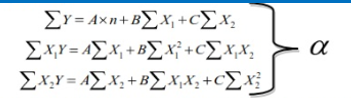



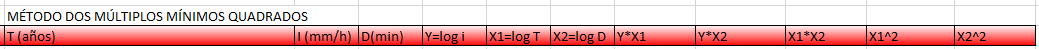

In [49]:
base_calculo=[]
for colunay in coluna:
    print(colunay)
    for linhax in lista_teste:
        print(linhax)
        Tano= linhax
        #prepara_planilha[coluna][linha]
        I_mm_h = prepara_planilha[colunay][linhax]
        if colunay =='10min':
            registro= [Tano, I_mm_h, 10]
            
        elif  colunay== '30min':
            registro= [Tano, I_mm_h, 30]
        
        elif  colunay== '1h':
            registro= [Tano, I_mm_h, 1*60]
        
        elif  colunay== '2h':
            registro= [Tano, I_mm_h, 2*60]
        
        elif  colunay== '10h':
            registro= [Tano, I_mm_h, 10*60]     
            
        elif  colunay== '6h':
            registro= [Tano, I_mm_h, 6*60]   
        
        elif  colunay== '8h':
            registro= [Tano, I_mm_h, 8*60]   
            
        elif  colunay== '12h':
            registro= [Tano, I_mm_h, 12*60]   
            
            
        print(registro)
        base_calculo.append(registro)

10min
2
[2, 14.582919085987887, 10]
5
[5, 18.01323969621556, 10]
10
[10, 20.284410422231314, 10]
25
[25, 23.15404065530909, 10]
50
[50, 25.282896291995748, 10]
100
[100, 27.396032792829384, 10]
500
[500, 32.279168659514724, 10]
1000
[1000, 34.37849594546127, 10]
10000
[10000, 41.34863958262416, 10]
30min
2
[2, 27.00540571479238, 30]
5
[5, 33.35785128928807, 30]
10
[10, 37.56372300413206, 30]
25
[25, 42.8778530653872, 30]
50
[50, 46.82017831851065, 30]
100
[100, 50.733394060795156, 30]
500
[500, 59.77623825836061, 30]
1000
[1000, 63.663881380483836, 30]
10000
[10000, 76.57155478263734, 30]
1h
2
[2, 36.493791506476185, 60]
5
[5, 45.07817741795685, 60]
10
[10, 50.76178784342169, 60]
25
[25, 57.943044682955666, 60]
50
[50, 63.27051124123059, 60]
100
[100, 68.55864062269615, 60]
500
[500, 80.77870034913593, 60]
1000
[1000, 86.03227213578894, 60]
10000
[10000, 103.47507403059096, 60]
6h
2
[2, 62.56078543967347, 360]
5
[5, 77.27687557364031, 360]
10
[10, 87.02020773158006, 360]
25
[25, 99.330

In [50]:
#print(base_calculo)

In [51]:
base_calculo_df = pd.DataFrame(base_calculo, columns=['T(anos)', 'I(mm/h)','D(min)'])    
display(base_calculo_df)

,T(anos),I(mm/h),D(min)
0,2,14.582919,10
1,5,18.013240,10
2,10,20.284410,10
3,25,23.154041,10
4,50,25.282896,10
...,...,...,...
58,50,128.047463,720
59,100,138.749630,720
60,500,163.480703,720
61,1000,174.112932,720


In [52]:
import numpy as np
#https://numpy.org/
base_calculo_df['Y=log i'] = np.log10(base_calculo_df['I(mm/h)'])
base_calculo_df['X1=log T']=  np.log10(base_calculo_df['T(anos)'])
base_calculo_df['X2=log D']= np.log10(base_calculo_df['D(min)'])

In [53]:
base_calculo_df['Y*X1']= base_calculo_df['Y=log i'] *base_calculo_df['X1=log T']

base_calculo_df['Y*X2']= base_calculo_df['Y=log i'] *base_calculo_df['X2=log D']


base_calculo_df['X1*X2'] = base_calculo_df['X1=log T']* base_calculo_df['X2=log D']

In [54]:
base_calculo_df['X1^2'] = base_calculo_df['X1=log T']**2

base_calculo_df['X2^2'] = base_calculo_df['X2=log D']**2

In [55]:
display(base_calculo_df)

,T(anos),I(mm/h),D(min),Y=log i,X1=log T,X2=log D,Y*X1,Y*X2,X1*X2,X1^2,X2^2
0,2,14.582919,10,1.163844,0.30103,1.000000,0.350352,1.163844,0.301030,0.090619,1.000000
1,5,18.013240,10,1.255592,0.69897,1.000000,0.877621,1.255592,0.698970,0.488559,1.000000
2,10,20.284410,10,1.307162,1.00000,1.000000,1.307162,1.307162,1.000000,1.000000,1.000000
3,25,23.154041,10,1.364627,1.39794,1.000000,1.907666,1.364627,1.397940,1.954236,1.000000
4,50,25.282896,10,1.402827,1.69897,1.000000,2.383361,1.402827,1.698970,2.886499,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
58,50,128.047463,720,2.107371,1.69897,2.857332,3.580360,6.021460,4.854522,2.886499,8.164349
59,100,138.749630,720,2.142232,2.00000,2.857332,4.284464,6.121069,5.714665,4.000000,8.164349
60,500,163.480703,720,2.213466,2.69897,2.857332,5.974080,6.324610,7.711855,7.284439,8.164349
61,1000,174.112932,720,2.240831,3.00000,2.857332,6.722493,6.402799,8.571997,9.000000,8.164349


# Vamos fazer a soma de cada coluna para servir de base para o cálculo dos mínimos quadrados

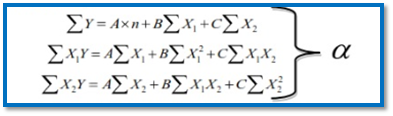

In [56]:
xA_1 =len(base_calculo_df)
print(xA_1)
somaX1=base_calculo_df['X1=log T'].sum()
yB_1= somaX1
print(yB_1)
somaX2=base_calculo_df['X2=log D'].sum()
zC_1= somaX2
print(zC_1)

igual_1=base_calculo_df['Y=log i'].sum()
print(igual_1)
registro=[xA_1,yB_1,zC_1,igual_1]

63
117.57116012140852
136.15469991054985
118.3861469228622


In [57]:
matriz_base= []
matriz_base.append(registro)

In [58]:
matriz_base

[[63, 117.57116012140852, 136.15469991054985, 118.3861469228622]]

In [59]:

somaX1=base_calculo_df['X1=log T'].sum()
xA_2= somaX1
print(xA_2)
somaX1el2=base_calculo_df['X1^2'].sum()
yB_2= somaX1el2
print(yB_2)
somaX1mulX2=base_calculo_df['X1*X2'].sum()
zC_2= somaX1mulX2
print(zC_2)
igual_2=base_calculo_df['Y*X1'].sum()
print(igual_2)
registro=[xA_2, yB_2,zC_2, igual_2]
matriz_base.append(registro)

117.57116012140852
298.93046787125223
254.09311149945367
230.36119579028826


In [60]:
matriz_base

[[63, 117.57116012140852, 136.15469991054985, 118.3861469228622],
 [117.57116012140852,
  298.93046787125223,
  254.09311149945367,
  230.36119579028826]]

In [61]:
somaX2=base_calculo_df['X2=log D'].sum()
xA_3= somaX2
print(xA_3)
somaXvezY=base_calculo_df['X1*X2'].sum()
yB_3= somaXvezY
print(yB_3)
somaX2el2=base_calculo_df['X2^2'].sum()
zA_3= somaX2el2
print(zA_3)
igual_3=base_calculo_df['Y*X2'].sum()
print(igual_3)
registro=[xA_3, yB_3,zA_3, igual_3]

matriz_base.append(registro)

136.15469991054985
254.09311149945367
323.5492753558946
266.4452241410735


In [62]:
matriz_base

[[63, 117.57116012140852, 136.15469991054985, 118.3861469228622],
 [117.57116012140852,
  298.93046787125223,
  254.09311149945367,
  230.36119579028826],
 [136.15469991054985,
  254.09311149945367,
  323.5492753558946,
  266.4452241410735]]

In [63]:
matriz_base_df= pd.DataFrame(matriz_base, columns=['Ax','By','Cz','igual'])

In [64]:
matriz_base_df

,Ax,By,Cz,igual
0,63.00000,117.571160,136.154700,118.386147
1,117.57116,298.930468,254.093111,230.361196
2,136.15470,254.093111,323.549275,266.445224


In [65]:
opreparoM= matriz_base_df[['Ax','By','Cz']]

In [66]:
opreparoM

,Ax,By,Cz
0,63.00000,117.571160,136.154700
1,117.57116,298.930468,254.093111
2,136.15470,254.093111,323.549275


In [67]:
#transformar em matriz
A_opreparoM = np.array(opreparoM)

In [68]:
A_opreparoM

array([[ 63.        , 117.57116012, 136.15469991],
       [117.57116012, 298.93046787, 254.0931115 ],
       [136.15469991, 254.0931115 , 323.54927536]])

In [69]:
# Calcular a matriz inversa de 'A'
A_inversa = np.linalg.inv(A_opreparoM)

# Exibir a matriz inversa
print("Matriz Inversa:")
print(A_inversa)

Matriz Inversa:
[[ 2.19115766e-01 -2.34689755e-02 -7.37765101e-02]
 [-2.34689755e-02  1.25757495e-02  1.39618866e-17]
 [-7.37765101e-02  1.31847586e-17  3.41370525e-02]]


In [70]:
igual_M= matriz_base_df['igual']

In [71]:
display(igual_M)

0    118.386147
1    230.361196
2    266.445224
Name: igual, dtype: float64

In [72]:
list(igual_M)

[118.3861469228622, 230.36119579028826, 266.4452241410735]

In [73]:
lista0=[ [igual_M[0]],
 
  [igual_M[1]],
 
  [igual_M[2]]
    
    
    
] #transformado em matriz

In [74]:
lista0

[[118.3861469228622], [230.36119579028826], [266.4452241410735]]

# Mudar para matriz

In [75]:
A_igual_M= np.array(lista0)

In [76]:
A_igual_M

array([[118.38614692],
       [230.36119579],
       [266.44522414]])

In [77]:
# Realizar a multiplicação da matriz pelo vetor
resultado = np.dot(A_inversa, igual_M)

In [78]:
resultado

array([0.87653126, 0.11856311, 0.36153784])

In [79]:
local=pd.DataFrame(resultado)
display(local)
# o que achamos foram os valores de A, B, C

print('o que achamos foram os valores de A={}, B={}, C={}'.format(local[0][0],local[0][1],local[0][2]))

,0
0,0.876531
1,0.118563
2,0.361538


o que achamos foram os valores de A=0.8765312584005258, B=0.11856310778721973, C=0.36153783560777164





#### Vamos achar a fórmula 
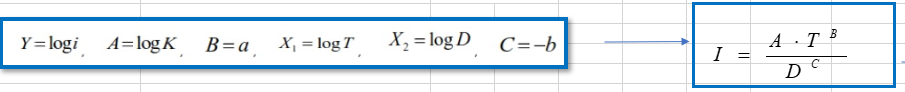

In [80]:
# A= logK, queremos achar o valor de k

k=10**(local[0][0])
print(k)

7.525428925947161


In [81]:
#a=B e b= -C
print('k ={}, a= {} e b={}'.format(k, local[0][1], -1*local[0][2]))

k =7.525428925947161, a= 0.11856310778721973 e b=-0.36153783560777164


In [82]:
k=10**(local[0][0])
a=local[0][1]
b=-1*local[0][2]
print(k, a, b)

7.525428925947161 0.11856310778721973 -0.36153783560777164


In [83]:
print(f'I= {k}*T^{a}/D^{b}')
print('I=PMA')

I= 7.525428925947161*T^0.11856310778721973/D^-0.36153783560777164
I=PMA


In [84]:
print(f'T=(PMA*(d^{b})*({1/k}))^{1/a}')

T=(PMA*(d^-0.36153783560777164)*(0.13288279111268578))^8.434326821077079


In [85]:
print(f'T=(PMA^{1/a}*(d^{b*(1/a)})*({(1/k)*1/a}))')


T=(PMA^8.434326821077079*(d^-3.049328263700784)*(1.1207768891413084))


In [86]:
#print(f'T=(PMA^{1/a:.2f}*(d^{b*(1/a)})*({(1/k)*1/a}))')
#print()
t1= b*(1/a)
t2= (1/k)*1/a
print(f'T=(PMA^{1/a:.3f}*(d^{t1:.3f})*({t2:.3f}))')

T=(PMA^8.434*(d^-3.049)*(1.121))


In [87]:
Ind_parametros_

,10min,30min,1h,6h,8h,10h,12h
Variaveis,,,,,,,
media,15.220564,28.186230,38.089500,65.296286,70.737643,74.365214,77.085893
desvio_padrao,3.881641,7.188224,9.713817,16.652257,18.039945,18.965071,19.658915
alfa,0.330414,0.178424,0.132034,0.077020,0.071095,0.067627,0.065240
X0,13.473667,24.951234,33.717884,57.802087,62.618928,65.830155,68.238575
2,14.582919,27.005406,36.493792,62.560785,67.774184,71.249783,73.856483
5,18.013240,33.357851,45.078177,77.276876,83.716615,88.009775,91.229645
10,20.284410,37.563723,50.761788,87.020208,94.271892,99.106348,102.732190
25,23.154041,42.877853,57.943045,99.330934,107.608512,113.126897,117.265686
50,25.282896,46.820178,63.270511,108.463734,117.502378,123.528141,128.047463


https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution

Vídeo da Curva IDF de tempo de retorno https://www.youtube.com/watch?v=ZrNqqSdF97k    

# ajuste final, para o cálculo do período

In [88]:
print('k:',k,'a:',a,'b:',b)

k: 7.525428925947161 a: 0.11856310778721973 b: -0.36153783560777164


In [89]:
print(f'I= {k}*T^{a}/D^{b}')
print('I=PMA')

I= 7.525428925947161*T^0.11856310778721973/D^-0.36153783560777164
I=PMA


In [90]:
print(f'I= {k:.3f}*T^{a:.3f}/D^{b:.3f}')
print('I=PMA')

I= 7.525*T^0.119/D^-0.362
I=PMA


In [91]:
base = [('5 min', 5),
        ('10 min', 10),
        ('30 min', 30),
        ('1 h', 1*60),
        ('2 h', 2*60),
        ('6 h', 6*60), 
        ('12 h', 12*60),
        ('1 d', 1*24*60),
        ('2 d', 2*24*60),
        ('5 d', 5*24*60),
        ('7 d', 7*24*60),
        ('10 d', 10*24*60),
        ('30 d', 30*24*60)]

In [92]:
base_df= pd.DataFrame(base, columns=['duracao', 'duracao_calculo'])

In [93]:
base_df

,duracao,duracao_calculo
0,5 min,5
1,10 min,10
2,30 min,30
3,1 h,60
4,2 h,120
5,6 h,360
6,12 h,720
7,1 d,1440
8,2 d,2880
9,5 d,7200


In [94]:
lista_coluna= [1,2,5,10,25,50,100,500,1000,10000]

In [95]:
for coluna in lista_coluna:
    print(coluna)
    base_df[coluna]=0
    
display(base_df)

1
2
5
10
25
50
100
500
1000
10000


,duracao,duracao_calculo,1,2,5,10,25,50,100,500,1000,10000
0,5 min,5,0,0,0,0,0,0,0,0,0,0
1,10 min,10,0,0,0,0,0,0,0,0,0,0
2,30 min,30,0,0,0,0,0,0,0,0,0,0
3,1 h,60,0,0,0,0,0,0,0,0,0,0
4,2 h,120,0,0,0,0,0,0,0,0,0,0
5,6 h,360,0,0,0,0,0,0,0,0,0,0
6,12 h,720,0,0,0,0,0,0,0,0,0,0
7,1 d,1440,0,0,0,0,0,0,0,0,0,0
8,2 d,2880,0,0,0,0,0,0,0,0,0,0
9,5 d,7200,0,0,0,0,0,0,0,0,0,0


In [96]:
print('k',k)
print('a',a)
print('b',b)

k 7.525428925947161
a 0.11856310778721973
b -0.36153783560777164


In [97]:
for T in lista_coluna:
    print('T',T)
    for i, d in enumerate(base_df['duracao_calculo']):
        print('d',d)
        #I ou PMA
        #'I= {k}*T^{a}/D^{b}'
        #T=T*365*24
        #T=T*365
        I= k*(T**a)/(d**b)
        print(I)
        base_df.loc[i,T]=I
    print()

T 1
d 5
13.465899253417744
d 10
17.30091585953788
d 30
25.73750711959601
d 60
33.06741248620079
d 120
42.48483598087146
d 360
63.20207423757476
d 720
81.20168938996193
d 1440
104.32749936336386
d 2880
134.03941722372812
d 7200
186.6821957409216
d 10080
210.83063369443894
d 14400
239.84829384251674
d 43200
356.8075366941654

T 2
d 5
14.619294428083075
d 10
18.78279185564837
d 30
27.942002783866055
d 60
35.89973681022036
d 120
46.12379123329161
d 360
68.61552387674067
d 720
88.15686074201881
d 1440
113.26346658590663
d 2880
145.52030046303813
d 7200
202.67209286634812
d 10080
228.88891788315223
d 14400
260.3920287660836
d 43200
387.36918603985026

T 5
d 5
16.2969906689563
d 10
20.93828707768813
d 30
31.148600288524708
d 60
40.01955625780928
d 120
51.41691338413001
d 360
76.4897757457243
d 720
98.27365773257388
d 1440
126.26147364118708
d 2880
162.22007091082395
d 7200
225.93054832768783
d 10080
255.15599109924707
d 14400
290.27436884502913
d 43200
431.8233031962002

T 10
d 5
17.692877423

/tmp/ipykernel_11737/1318808896.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.465899253417744' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  base_df.loc[i,T]=I
/tmp/ipykernel_11737/1318808896.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14.619294428083075' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  base_df.loc[i,T]=I
/tmp/ipykernel_11737/1318808896.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16.2969906689563' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  base_df.loc[i,T]=I
/tmp/ipykernel_11737/1318808896.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will

In [98]:
base_df

,duracao,duracao_calculo,1,2,5,10,25,50,100,500,1000,10000
0,5 min,5,13.465899,14.619294,16.296991,17.692877,19.723295,21.412655,23.246714,28.134139,30.543914,40.131722
1,10 min,10,17.300916,18.782792,20.938287,22.731715,25.340385,27.510866,29.867255,36.146593,39.242658,51.561023
2,30 min,30,25.737507,27.942003,31.148600,33.816573,37.697330,40.926221,44.431676,53.773060,58.378886,76.704159
3,1 h,60,33.067412,35.899737,40.019556,43.447353,48.433329,52.581791,57.085581,69.087342,75.004883,98.549096
4,2 h,120,42.484836,46.123791,51.416913,55.820928,62.226885,67.556806,73.343252,88.763050,96.365875,126.615355
5,6 h,360,63.202074,68.615524,76.489776,83.041357,92.571104,100.500100,109.108239,132.047324,143.357578,188.357867
6,12 h,720,81.201689,88.156861,98.273658,106.691095,118.934863,129.121995,140.181686,169.653700,184.185055,242.001187
7,1 d,1440,104.327499,113.263467,126.261474,137.076152,152.806880,165.895254,180.104686,217.970173,236.639981,310.921840
8,2 d,2880,134.039417,145.520300,162.220071,176.114713,196.325469,213.141341,231.397545,280.046921,304.033791,399.470729
9,5 d,7200,186.682196,202.672093,225.930548,245.282186,273.430535,296.850691,322.276854,390.032837,423.440334,556.359274


In [99]:
base_df.round(0)

,duracao,duracao_calculo,1,2,5,10,25,50,100,500,1000,10000
0,5 min,5,13.0,15.0,16.0,18.0,20.0,21.0,23.0,28.0,31.0,40.0
1,10 min,10,17.0,19.0,21.0,23.0,25.0,28.0,30.0,36.0,39.0,52.0
2,30 min,30,26.0,28.0,31.0,34.0,38.0,41.0,44.0,54.0,58.0,77.0
3,1 h,60,33.0,36.0,40.0,43.0,48.0,53.0,57.0,69.0,75.0,99.0
4,2 h,120,42.0,46.0,51.0,56.0,62.0,68.0,73.0,89.0,96.0,127.0
5,6 h,360,63.0,69.0,76.0,83.0,93.0,101.0,109.0,132.0,143.0,188.0
6,12 h,720,81.0,88.0,98.0,107.0,119.0,129.0,140.0,170.0,184.0,242.0
7,1 d,1440,104.0,113.0,126.0,137.0,153.0,166.0,180.0,218.0,237.0,311.0
8,2 d,2880,134.0,146.0,162.0,176.0,196.0,213.0,231.0,280.0,304.0,399.0
9,5 d,7200,187.0,203.0,226.0,245.0,273.0,297.0,322.0,390.0,423.0,556.0


In [100]:
for t in lista_coluna:
    base_df[t]=base_df[t].astype('int')
display(base_df)

,duracao,duracao_calculo,1,2,5,10,25,50,100,500,1000,10000
0,5 min,5,13,14,16,17,19,21,23,28,30,40
1,10 min,10,17,18,20,22,25,27,29,36,39,51
2,30 min,30,25,27,31,33,37,40,44,53,58,76
3,1 h,60,33,35,40,43,48,52,57,69,75,98
4,2 h,120,42,46,51,55,62,67,73,88,96,126
5,6 h,360,63,68,76,83,92,100,109,132,143,188
6,12 h,720,81,88,98,106,118,129,140,169,184,242
7,1 d,1440,104,113,126,137,152,165,180,217,236,310
8,2 d,2880,134,145,162,176,196,213,231,280,304,399
9,5 d,7200,186,202,225,245,273,296,322,390,423,556


In [101]:
#!pip install openpyxl

In [102]:
base_df.to_excel('periodo_retorno_completo_cidade.xlsx')

In [103]:
display(Max_anual_novo_deletado)


,ano,chuva diaria(mm)
1,1962,75.8
2,1963,102.5
4,1965,99.5
5,1966,124.6
7,1968,99.7
8,1969,76.5
9,1970,115.1
10,1971,68.8
11,1972,112.7
12,1973,62.5


In [104]:
Max_anual_novo_deletado.sort_values(by='chuva diaria(mm)', ascending=False)

,ano,chuva diaria(mm)
46,2007,142.3
5,1966,124.6
13,1974,124.1
50,2011,118.9
9,1970,115.1
11,1972,112.7
20,1981,105.8
22,1983,103.5
2,1963,102.5
18,1979,102.2


In [105]:


zerado_0.sort_values(by='Pmax(mm)', ascending=False)

,ano,Pmax(mm),10min,30min,1h,6h,8h,10h,12h
46,2007,142.3,23.882494,44.22684,59.766,102.456,110.994,116.686,120.955
5,1966,124.6,20.911867,38.72568,52.332,89.712,97.188,102.172,105.910
13,1974,124.1,20.827951,38.57028,52.122,89.352,96.798,101.762,105.485
50,2011,118.9,19.955225,36.95412,49.938,85.608,92.742,97.498,101.065
9,1970,115.1,19.317463,35.77308,48.342,82.872,89.778,94.382,97.835
11,1972,112.7,18.914666,35.02716,47.334,81.144,87.906,92.414,95.795
20,1981,105.8,17.756626,32.88264,44.436,76.176,82.524,86.756,89.930
22,1983,103.5,17.370612,32.16780,43.470,74.520,80.730,84.870,87.975
2,1963,102.5,17.202780,31.85700,43.050,73.800,79.950,84.050,87.125
18,1979,102.2,17.152430,31.76376,42.924,73.584,79.716,83.804,86.870


In [106]:
display(ler)

,data,chuva diaria(mm),ano
0,1961-01-01,NaN,1961
1,1961-01-02,0.0,1961
2,1961-01-03,4.1,1961
3,1961-01-04,14.8,1961
4,1961-01-05,1.3,1961
...,...,...,...
23185,2024-06-24,0.0,2024
23186,2024-06-25,0.0,2024
23187,2024-06-26,0.0,2024
23188,2024-06-27,0.0,2024


<Axes: >

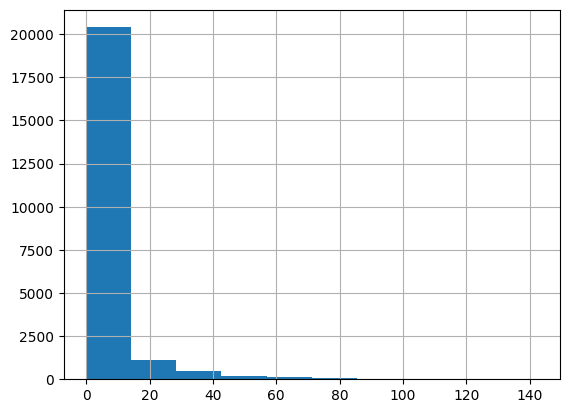

In [107]:
ler['chuva diaria(mm)'].hist()

<Axes: >

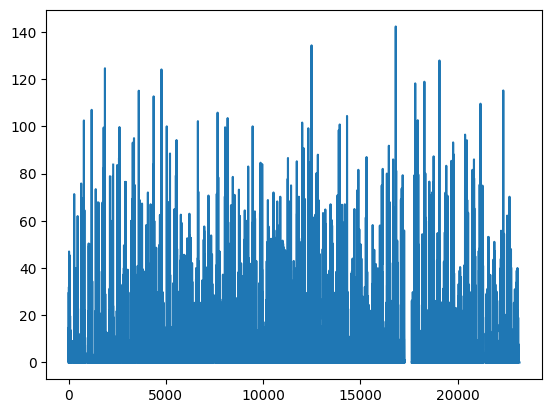

In [108]:
ler['chuva diaria(mm)'].plot()

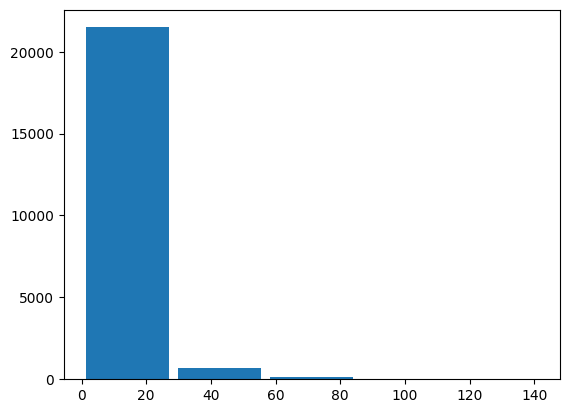

In [109]:
import matplotlib.pyplot as plt

plt.hist(ler['chuva diaria(mm)'], 5, rwidth=0.9)
plt.show()

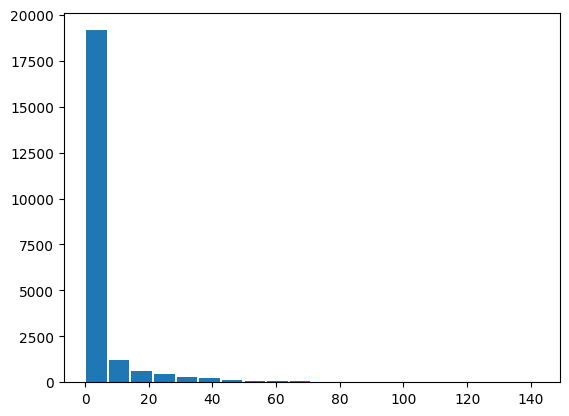

In [110]:
import matplotlib.pyplot as plt

plt.hist(ler['chuva diaria(mm)'], 20, rwidth=0.9)
plt.show()

In [111]:
novo= ler.loc[ler['chuva diaria(mm)']>5]
display(novo)

,data,chuva diaria(mm),ano
3,1961-01-04,14.8,1961
8,1961-01-09,29.7,1961
9,1961-01-10,28.8,1961
11,1961-01-12,19.4,1961
15,1961-01-16,32.0,1961
...,...,...,...
23116,2024-04-16,10.6,2024
23117,2024-04-17,8.2,2024
23118,2024-04-18,19.0,2024
23129,2024-04-29,7.8,2024


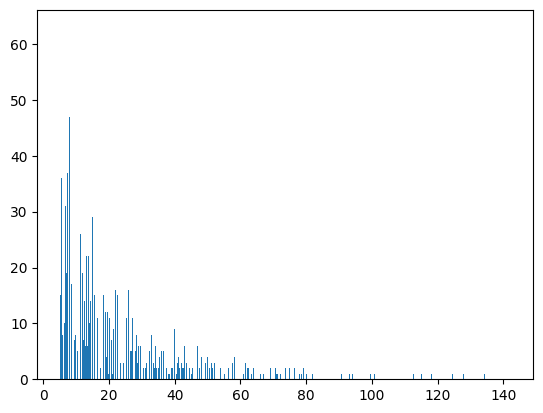

In [112]:
import matplotlib.pyplot as plt

plt.hist(novo['chuva diaria(mm)'], 2000, rwidth=0.9)
plt.show()

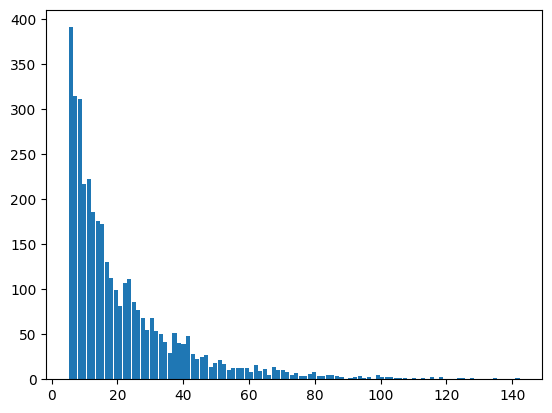

In [113]:
import matplotlib.pyplot as plt

plt.hist(novo['chuva diaria(mm)'], 100, rwidth=0.9)
plt.show()

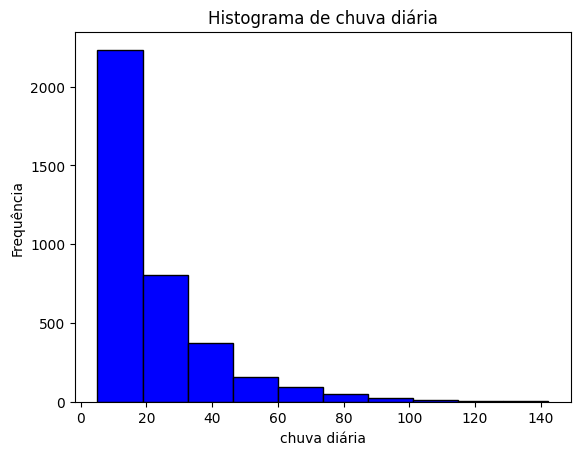

In [114]:
# Supondo que 'df' seja o seu DataFrame e 'idade' seja a coluna que você deseja analisar
plt.hist(novo['chuva diaria(mm)'], bins=10, color='blue', edgecolor='black')

# Adicione rótulos e título ao gráfico
plt.xlabel('chuva diária')
plt.ylabel('Frequência')
plt.title('Histograma de chuva diária')

# Exiba o histograma
plt.show()

Text(0.5, 1.0, 'Histograma de chuva diária')

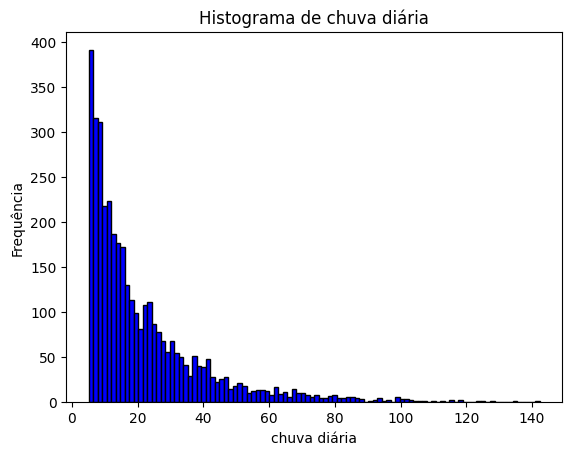

In [115]:
# Supondo que 'df' seja o seu DataFrame e 'idade' seja a coluna que você deseja analisar
plt.hist(novo['chuva diaria(mm)'], bins=100, color='blue', edgecolor='black')

# Adicione rótulos e título ao gráfico
plt.xlabel('chuva diária')
plt.ylabel('Frequência')
plt.title('Histograma de chuva diária')

# Exiba o histograma

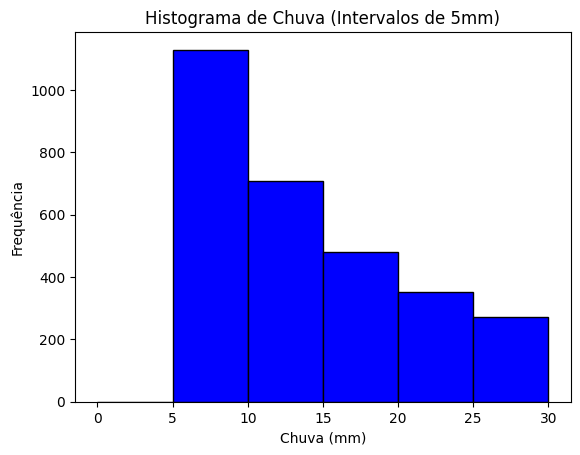

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'df' seja o seu DataFrame e 'chuva_dia' seja a coluna que você deseja analisar
chuva_column = novo['chuva diaria(mm)']

# Defina os limites dos bins com intervalos de 5 unidades (usando valores de ponto flutuante)
bins = [0, 5, 10, 15, 20, 25, 30]  # Defina os limites dos bins conforme necessário

# Crie o histograma com os bins especificados
plt.hist(chuva_column, bins=bins, color='blue', edgecolor='black')

# Adicione rótulos e título ao gráfico
plt.xlabel('Chuva (mm)')
plt.ylabel('Frequência')
plt.title('Histograma de Chuva (Intervalos de 5mm)')

# Exiba o histograma
plt.show()

In [117]:
valores= novo.loc[novo['chuva diaria(mm)']> 0.5]

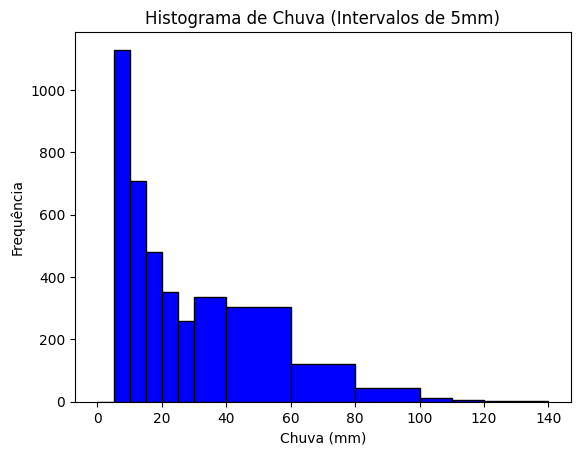

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'df' seja o seu DataFrame e 'chuva_dia' seja a coluna que você deseja analisar
chuva_column = novo['chuva diaria(mm)']

# Defina os limites dos bins com intervalos de 5 unidades (usando valores de ponto flutuante)
bins = [0, 0.5, 1, 1.5, 2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100, 110, 120, 130, 140]  # Defina os limites dos bins conforme necessário

# Crie o histograma com os bins especificados
plt.hist(chuva_column, bins=bins, color='blue', edgecolor='black')

# Adicione rótulos e título ao gráfico
plt.xlabel('Chuva (mm)')
plt.ylabel('Frequência')
plt.title('Histograma de Chuva (Intervalos de 5mm)')

# Exiba o histograma
plt.show()

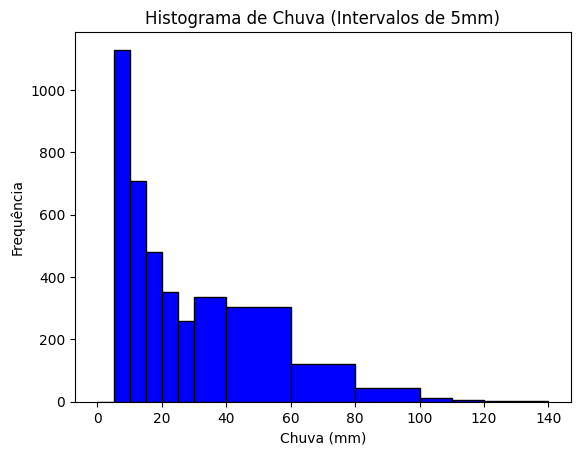

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'df' seja o seu DataFrame e 'chuva_dia' seja a coluna que você deseja analisar
chuva_column = valores['chuva diaria(mm)']

# Defina os limites dos bins com intervalos de 5 unidades (usando valores de ponto flutuante)
bins = [0, 0.5, 1, 1.5, 2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100, 110, 120, 130, 140]  # Defina os limites dos bins conforme necessário

# Crie o histograma com os bins especificados
plt.hist(chuva_column, bins=bins, color='blue', edgecolor='black')

# Adicione rótulos e título ao gráfico
plt.xlabel('Chuva (mm)')
plt.ylabel('Frequência')
plt.title('Histograma de Chuva (Intervalos de 5mm)')

# Exiba o histograma
plt.show()

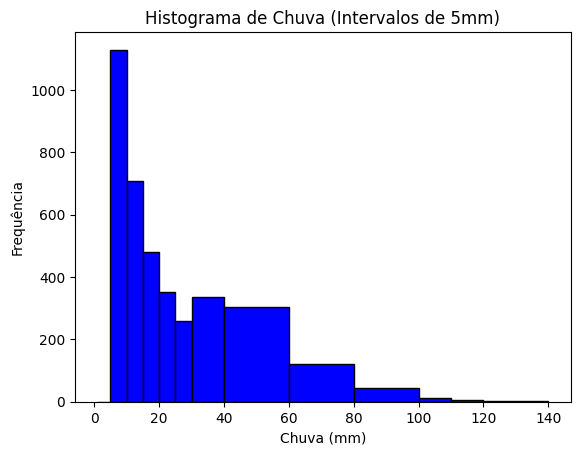

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'df' seja o seu DataFrame e 'chuva_dia' seja a coluna que você deseja analisar
chuva_column = valores['chuva diaria(mm)']

# Defina os limites dos bins com intervalos de 5 unidades (usando valores de ponto flutuante)
bins = [ 1,  5, 10, 15, 20, 25, 30, 40, 60, 80, 100, 110, 120, 130, 140]  # Defina os limites dos bins conforme necessário

# Crie o histograma com os bins especificados
plt.hist(chuva_column, bins=bins, color='blue', edgecolor='black')

# Adicione rótulos e título ao gráfico
plt.xlabel('Chuva (mm)')
plt.ylabel('Frequência')
plt.title('Histograma de Chuva (Intervalos de 5mm)')

# Exiba o histograma
plt.show()

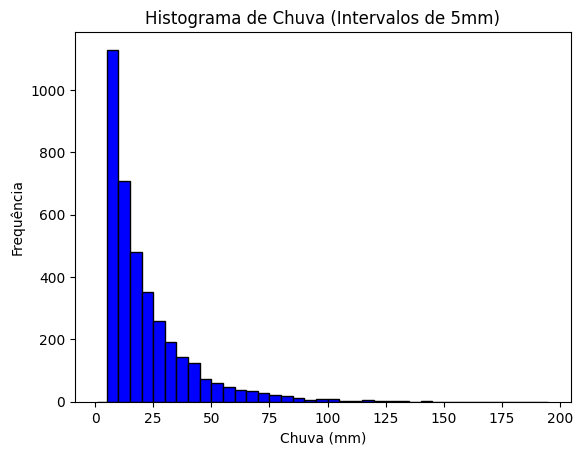

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'df' seja o seu DataFrame e 'chuva_dia' seja a coluna que você deseja analisar
chuva_column = valores['chuva diaria(mm)']

# Defina os limites dos bins com intervalos de 5 unidades (usando valores de ponto flutuante)
bins = [ 1,5, 10, 15, 20, 25, 30, 35,40, 45, 50, 55, 60, 65, 70, 75, 80, 85,90,95, 100, 105, 110, 115,
        120,125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195]  # Defina os limites dos bins conforme necessário

# Crie o histograma com os bins especificados
plt.hist(chuva_column, bins=bins, color='blue', edgecolor='black')

# Adicione rótulos e título ao gráfico
plt.xlabel('Chuva (mm)')
plt.ylabel('Frequência')
plt.title('Histograma de Chuva (Intervalos de 5mm)')

# Exiba o histograma
plt.show()

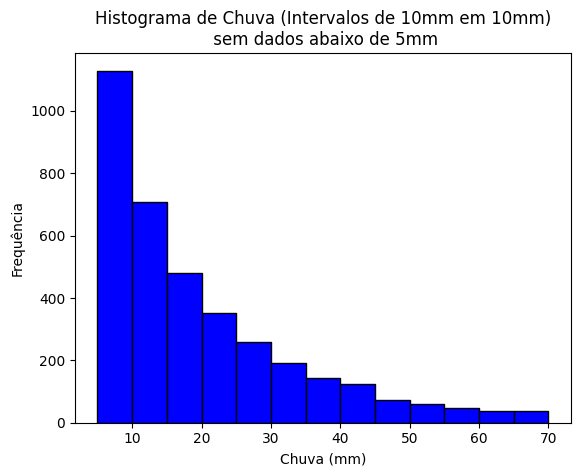

In [122]:
valores= novo.loc[novo['chuva diaria(mm)']> 5]

import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'df' seja o seu DataFrame e 'chuva_dia' seja a coluna que você deseja analisar
chuva_column = valores['chuva diaria(mm)']

# Defina os limites dos bins com intervalos de 5 unidades (usando valores de ponto flutuante)
#bins = [ 5,10, 15, 20, 25, 30, 35,40, 45, 50, 55, 60, 65, 70, 75, 80, 85,90,95, 100, 105, 110, 115,
       # 120,125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195]  # Defina os limites dos bins conforme necessário

bins = [ 5,10, 15, 20, 25, 30, 35,40, 45, 50, 55, 60, 65, 70]  # Defina os limites dos bins conforme necessário


# Crie o histograma com os bins especificados
plt.hist(chuva_column, bins=bins, color='blue', edgecolor='black')

# Adicione rótulos e título ao gráfico
plt.xlabel('Chuva (mm)')
plt.ylabel('Frequência')
plt.title('Histograma de Chuva (Intervalos de 10mm em 10mm)\n sem dados abaixo de 5mm')

# Exiba o histograma
plt.show()

https://github.com/SaulMontoya/Tutorial-to-estimate-Rainfall-for-a-given-Return-Period-with-Python/blob/master/Tutorial%20to%20estimate%20Rainfall%20for%20a%20given%20Return%20Period%20with%20Python.ipynb

https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution
                                                                                                                                                     
https://en.wikipedia.org/wiki/Gumbel_distribution
                                                                                                                                                     

In [123]:
novo.sort_values(by='chuva diaria(mm)', ascending=False)

,data,chuva diaria(mm),ano
16822,2007-01-22,142.3,2007
12492,1995-03-16,134.3,1995
19070,2013-03-19,127.9,2013
1868,1966-02-12,124.6,1966
4774,1974-01-27,124.1,1974
...,...,...,...
6533,1978-11-21,5.1,1978
1535,1965-03-16,5.1,1965
65,1961-03-07,5.1,1961
3315,1970-01-29,5.1,1970


In [124]:
novo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3757 entries, 3 to 23147
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              3757 non-null   datetime64[ns]
 1   chuva diaria(mm)  3757 non-null   float64       
 2   ano               3757 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 102.7 KB


In [125]:
novo.set_index('data', inplace=True)
novo_2=novo[['chuva diaria(mm)']]
# Display the resulting DataFrame
print(novo_2)

            chuva diaria(mm)
data                        
1961-01-04              14.8
1961-01-09              29.7
1961-01-10              28.8
1961-01-12              19.4
1961-01-16              32.0
...                      ...
2024-04-16              10.6
2024-04-17               8.2
2024-04-18              19.0
2024-04-29               7.8
2024-05-17               7.1

[3757 rows x 1 columns]


<Axes: xlabel='data'>

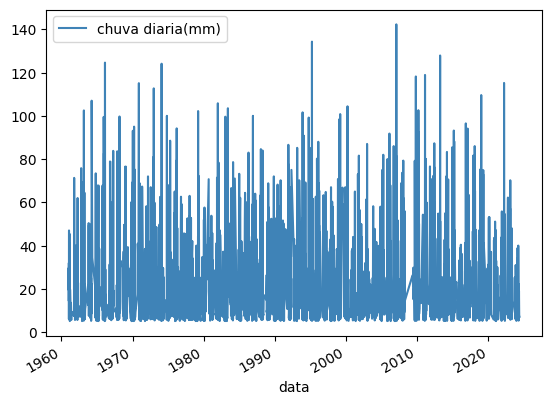

In [126]:
novo_2.plot(color='#3F83B7')


array([[<Axes: title={'center': 'chuva diaria(mm)'}>]], dtype=object)

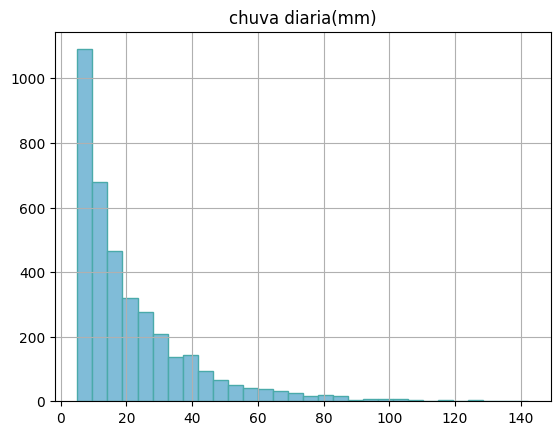

In [127]:
novo_2.hist(bins=30, edgecolor='#4aaaaa', color='#80BCD8' )


In [128]:
novo_2

,chuva diaria(mm)
data,
1961-01-04,14.8
1961-01-09,29.7
1961-01-10,28.8
1961-01-12,19.4
1961-01-16,32.0
...,...
2024-04-16,10.6
2024-04-17,8.2
2024-04-18,19.0


array([[<Axes: title={'center': 'chuva diaria(mm)'}>]], dtype=object)

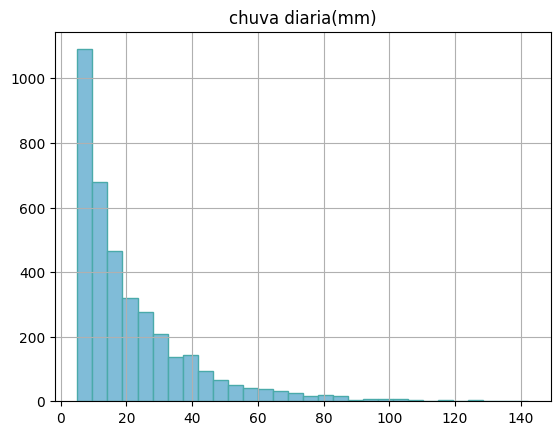

In [129]:
novo_2[novo_2>0].hist(bins=30, edgecolor='#4aaaaa', color='#80BCD8')


array([[<Axes: title={'center': 'chuva diaria(mm)'}>]], dtype=object)

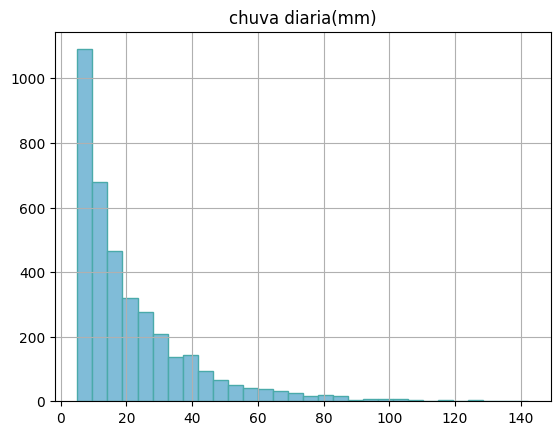

In [130]:
novo_2[novo_2>0].hist(bins=30, edgecolor='#4aaaaa', color='#80BCD8')


array([[<Axes: title={'center': 'chuva diaria(mm)'}>]], dtype=object)

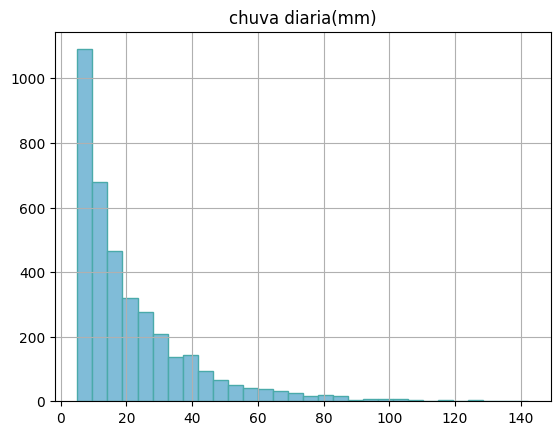

In [131]:
novo_2[novo_2>0].hist(bins=30, edgecolor='#4aaaaa', color='#80BCD8')


array([[<Axes: title={'center': 'chuva diaria(mm)'}>]], dtype=object)

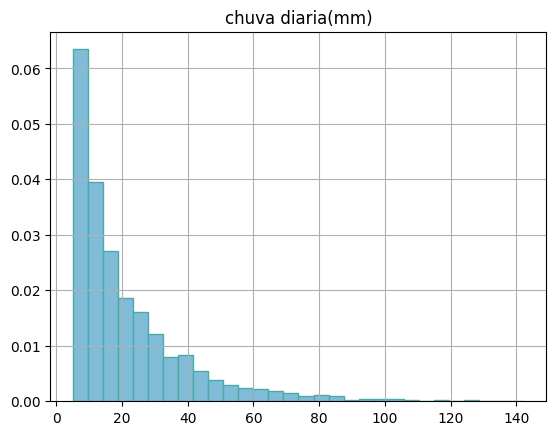

In [132]:
novo_2[novo_2 > 0].hist(bins=30, density=True, edgecolor='#4aaaaa', color='#80BCD8')


In [133]:
#hallamos el promedio y la desviación
promedio = novo_2[novo_2>0].mean()
desviacion = novo_2[novo_2>0].std()
print(promedio, desviacion)

chuva diaria(mm)    21.519164
dtype: float64 chuva diaria(mm)    18.177996
dtype: float64


array([[<Axes: title={'center': 'chuva diaria(mm)'}>]], dtype=object)

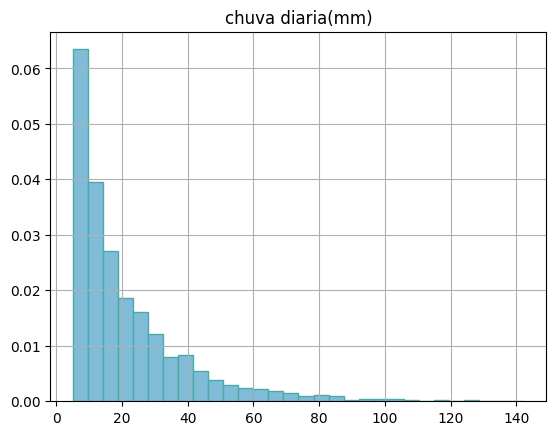

In [134]:
novo_2[novo_2 > 5].hist(bins=30, density=True, edgecolor='#4aaaaa', color='#80BCD8')


In [135]:
#!pip install scipy

In [136]:
from scipy import stats
import numpy as np

In [137]:
#determinamos las regresiones estadisticas
tabulaciones = np.arange(-40,51,0.1)
distnormal = stats.norm.pdf(tabulaciones, 
                            loc=promedio, scale=desviacion)
distlognormal = stats.pearson3.pdf(tabulaciones,skew=1,
                                   loc=promedio, scale=desviacion)
distweibull = stats.dweibull.pdf(tabulaciones,c=1,
                                   loc=promedio, scale=desviacion)
distchi2 = stats.chi2.pdf(tabulaciones,df=2,
                                   loc=promedio, scale=desviacion)

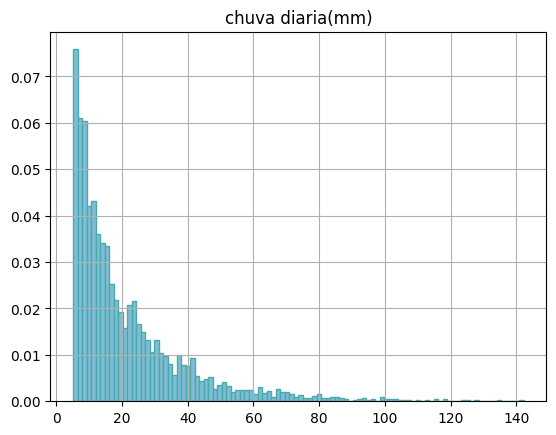

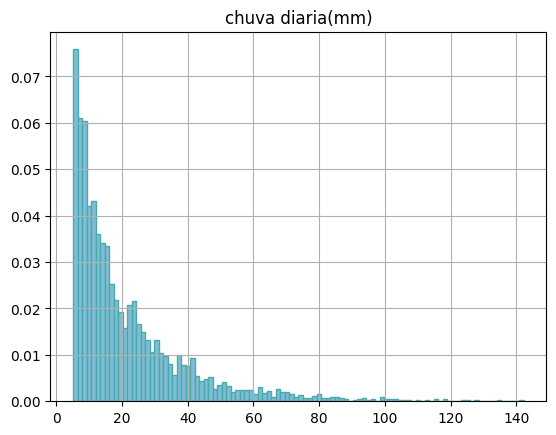

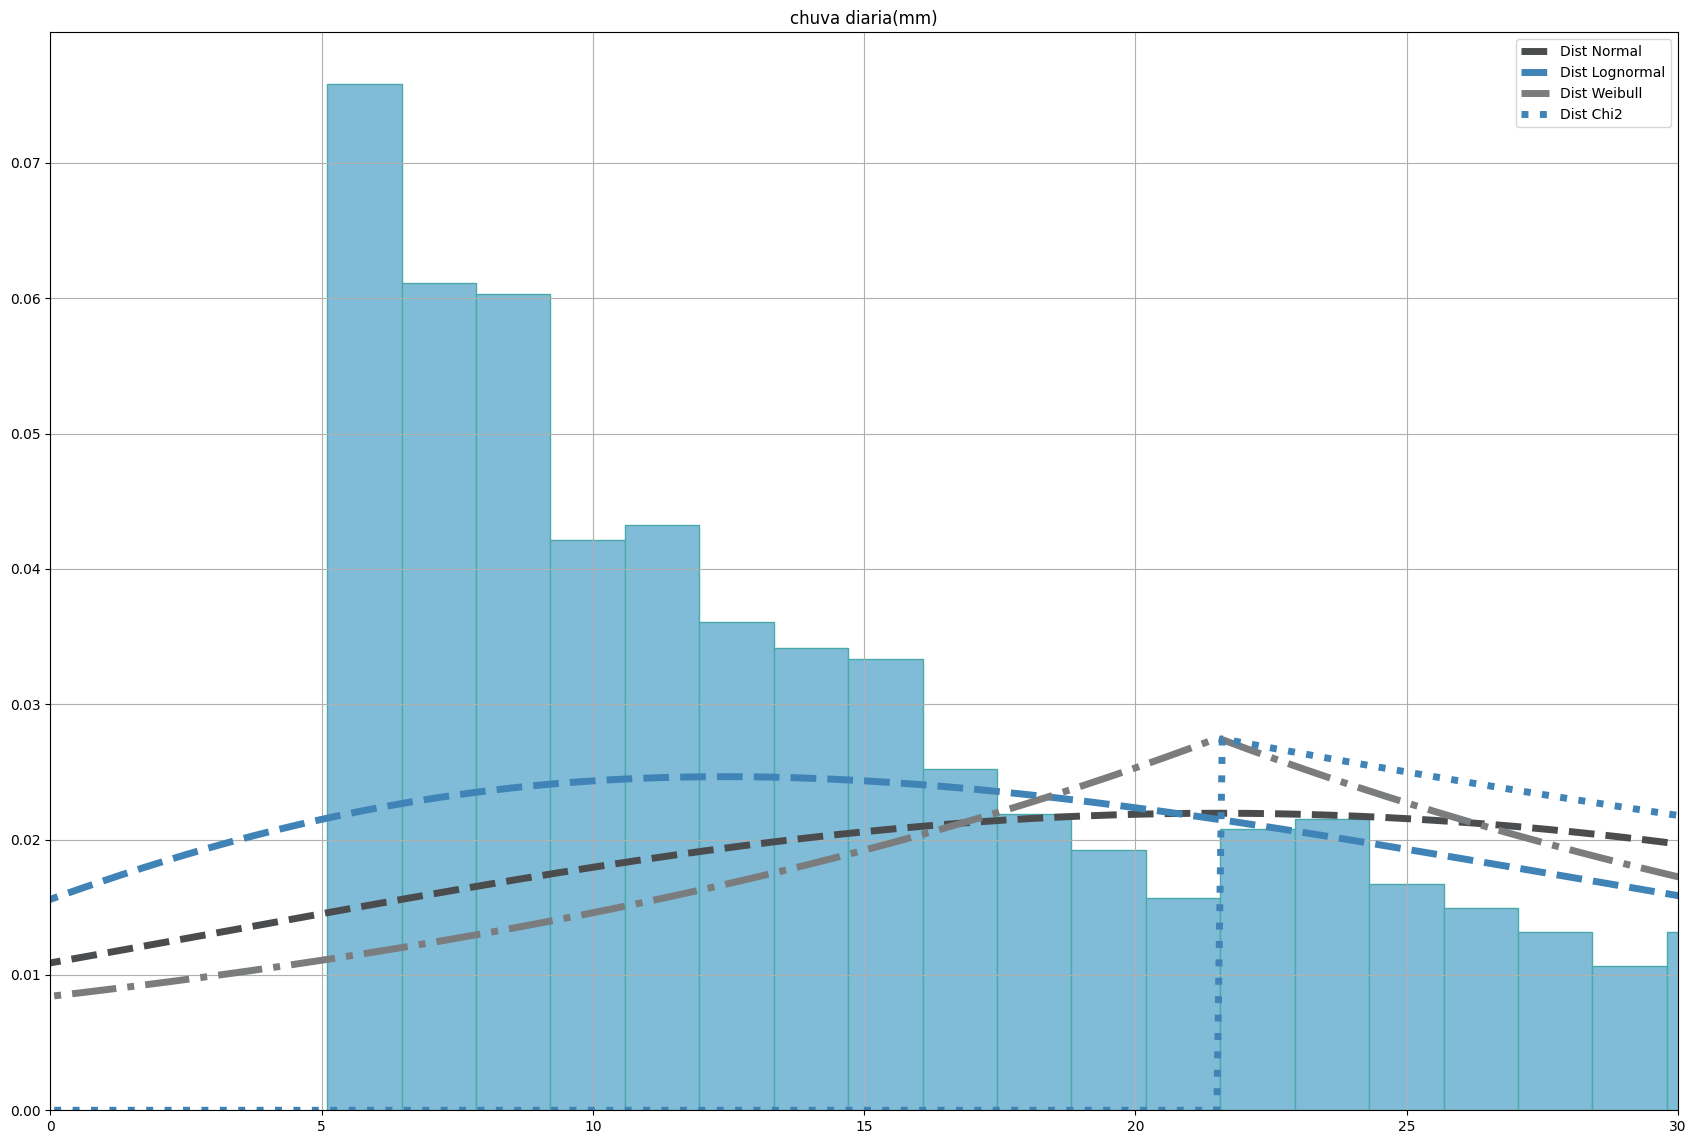

In [140]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib

# Ensure inline plotting in Jupyter
%matplotlib inline

# Assuming novo_2, tabulaciones, distnormal, distlognormal, distweibull, and distchi2 are defined

# Plot the histogram of novo_2 where values are greater than 0
novo_2[novo_2 > 0].hist(bins=100, density=True, edgecolor='#4aaaaa', color='#80BCD8')

# Plot the distributions
plt.plot(tabulaciones, distnormal, color='#4B4C4E', linewidth=5, linestyle='--', label='Dist Normal')
plt.plot(tabulaciones, distlognormal, color='#3F83B7', linewidth=5, linestyle='--', label='Dist Lognormal')
plt.plot(tabulaciones, distweibull, color='#7B7C7E', linewidth=5, linestyle='-.', label='Dist Weibull')
plt.plot(tabulaciones, distchi2, color='#3F83B7', linewidth=5, linestyle=':', label='Dist Chi2')

# Set the limits for the x-axis
plt.xlim(0, 30)

# Add the legend
plt.legend(loc='upper right')

# Set the figure size
plt.gcf().set_size_inches(21, 14)

# Show the plot
plt.show()

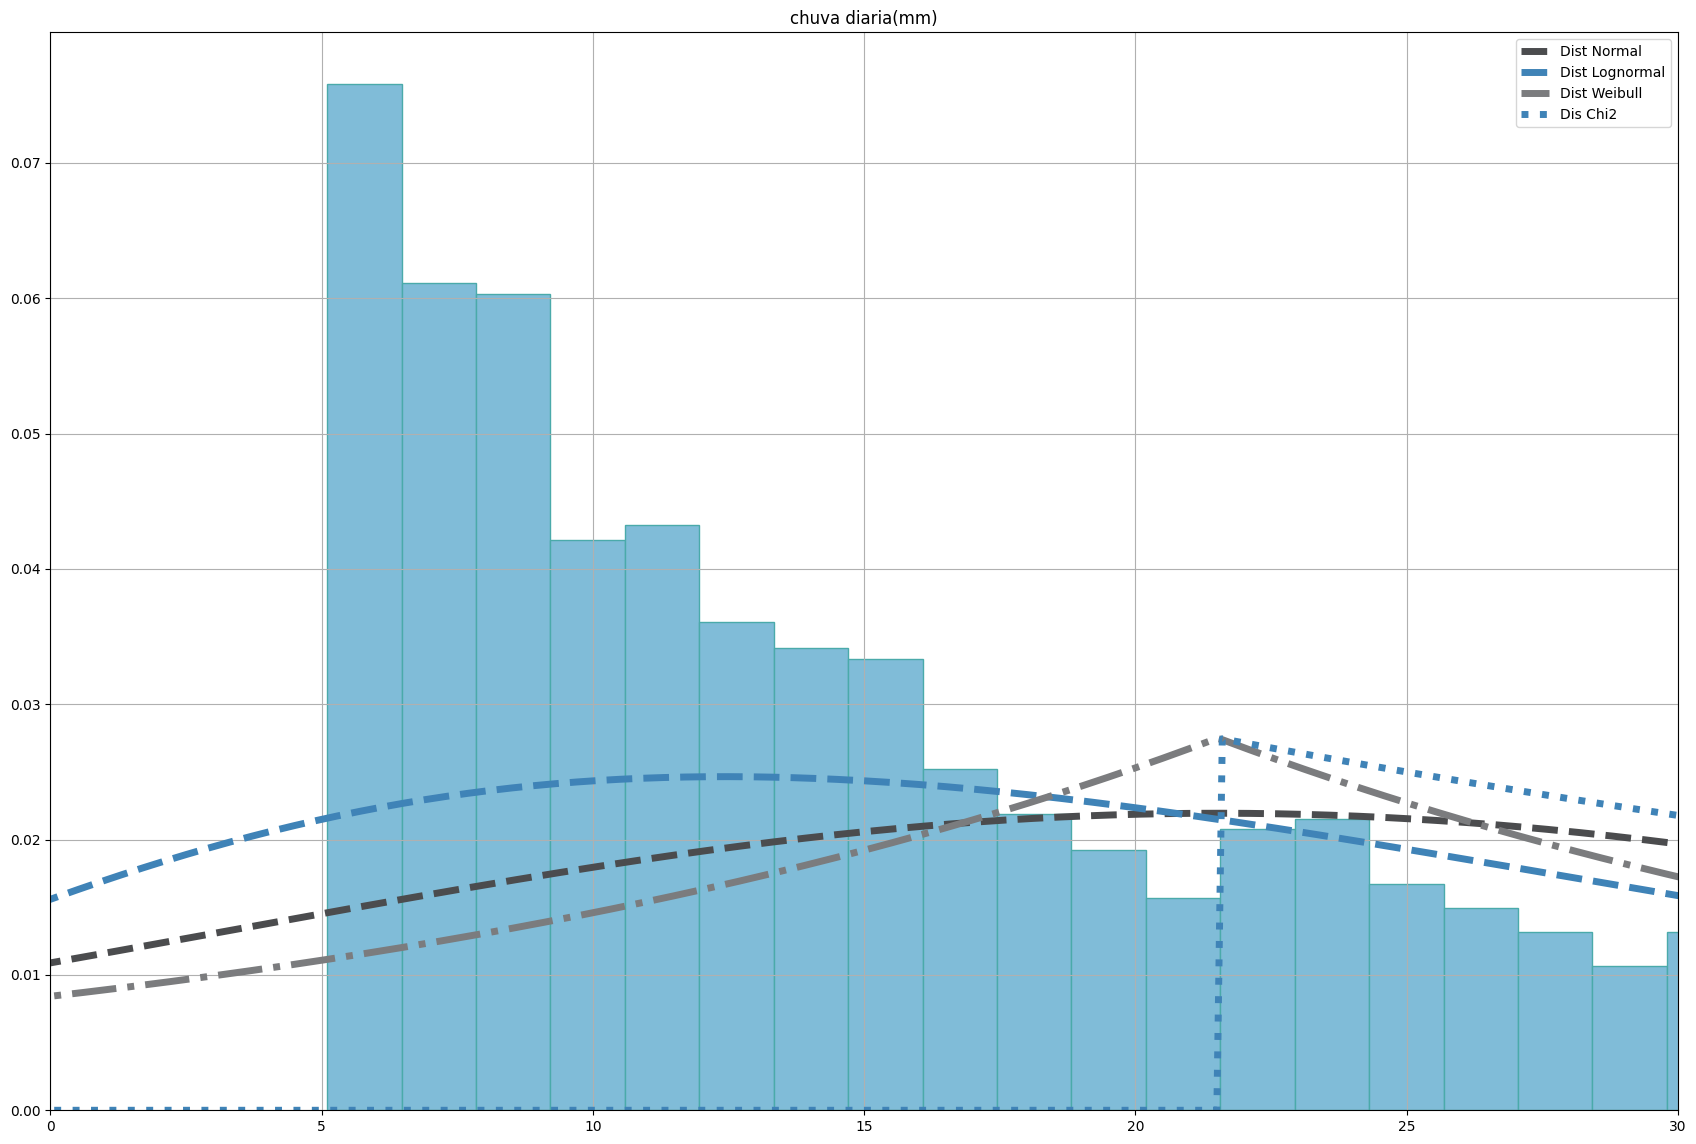

In [147]:
import pandas as pd
import numpy as np
from scipy import stats
#tem que ter o %pylab inline para plotar
#%pylab inline
# Ensure inline plotting in Jupyter
%matplotlib inline

import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib
#ploteamos los datos
novo_2[novo_2>0].hist(bins=100, density=True, edgecolor='#4aaaaa', color='#80BCD8')
plt.plot(tabulaciones,distnormal, color='#4B4C4E', linewidth=5, linestyle='--',label='Dist Normal')
plt.plot(tabulaciones,distlognormal, color='#3F83B7', linewidth=5, linestyle='--', label='Dist Lognormal')
plt.plot(tabulaciones,distweibull, color='#7B7C7E', linewidth=5, linestyle='-.', label='Dist Weibull')
plt.plot(tabulaciones,distchi2, color='#3F83B7', linewidth=5, linestyle=':', label='Dis Chi2')
plt.xlim(0,30)
plt.legend(loc='upper right')
#figsize(21,14)
# Set the figure size
plt.gcf().set_size_inches(21, 14)

plt.show()

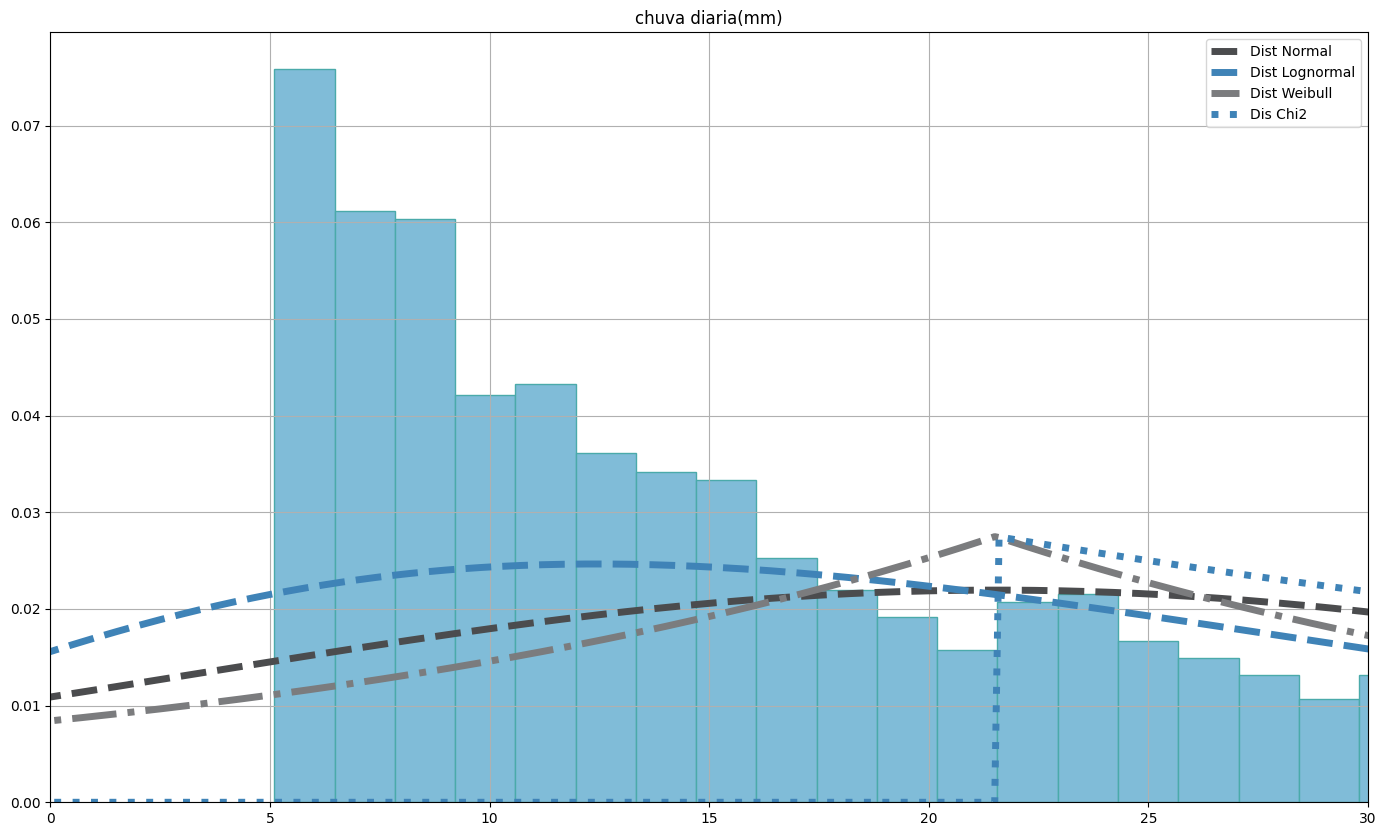

In [151]:
import pandas as pd
import numpy as np
from scipy import stats
#tem que ter o %pylab inline para plotar
#%pylab inline
# Ensure inline plotting in Jupyter
%matplotlib inline


import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib
#ploteamos los datos

novo_2[novo_2>0].hist(bins=100, density=True, edgecolor='#4aaaaa', color='#80BCD8')
plt.plot(tabulaciones,distnormal, color='#4B4C4E', linewidth=5, linestyle='--',label='Dist Normal')
plt.plot(tabulaciones,distlognormal, color='#3F83B7', linewidth=5, linestyle='--', label='Dist Lognormal')
plt.plot(tabulaciones,distweibull, color='#7B7C7E', linewidth=5, linestyle='-.', label='Dist Weibull')
plt.plot(tabulaciones,distchi2, color='#3F83B7', linewidth=5, linestyle=':', label='Dis Chi2')
plt.xlim(0,30)
plt.legend(loc='upper right')
#plt.figsize(17,10)

# Set the figure size
plt.gcf().set_size_inches(17,10)

plt.show()

# *Calculamos las precipitaciones para periodos de retorno de 100 años*

In [152]:
p100y_norm = stats.norm.ppf([0.99], loc=promedio, scale=desviacion)
p100y_lognorm = stats.pearson3.ppf([0.99], skew=1, loc=promedio, scale=desviacion)
p100y_weibull = stats.dweibull.ppf([0.99], c=1, loc=promedio, scale=desviacion)
p100y_chi2 = stats.chi2.ppf([0.99], df=2, loc=promedio, scale=desviacion)

print("Precipitación para T=100años Dist Normal =", p100y_norm[0])
print("Precipitación para T=100años Dist Logormal =", p100y_lognorm[0])
print("Precipitación para T=100años Dist Weibull =", p100y_weibull[0])
print("Precipitación para T=100años Dist Chi2 =", p100y_chi2[0])

Precipitación para T=100años Dist Normal = 63.80750612056275
Precipitación para T=100años Dist Logormal = 76.46322463749965
Precipitación para T=100años Dist Weibull = 92.63190200599225
Precipitación para T=100años Dist Chi2 = 188.94469286524705


# Calculamos las precipitaciones para periodos de retorno de 200 años

In [153]:
p200y_norm = stats.norm.ppf([0.995], loc=promedio, scale=desviacion)
p200y_lognorm = stats.pearson3.ppf([0.995], skew=1, loc=promedio, scale=desviacion)
p200y_weibull = stats.dweibull.ppf([0.995], c=1, loc=promedio, scale=desviacion)
p200y_chi2 = stats.chi2.ppf([0.995], df=2, loc=promedio, scale=desviacion)

print( "Precipitación para T=200años Dist Normal =", p200y_norm[0])
print ("Precipitación para T=200años Dist Logormal =", p200y_lognorm[0])
print ("Precipitación para T=200años Dist Weibull =", p200y_weibull[0])
print ("Precipitación para T=200años Dist Chi2 =", p200y_chi2[0])

Precipitación para T=200años Dist Normal = 68.3425784994249
Precipitación para T=200años Dist Logormal = 84.93744254432187
Precipitación para T=200años Dist Weibull = 105.23192854601187
Precipitación para T=200años Dist Chi2 = 214.14474594528633


# Calculamos las precipitaciones para periodos de retorno de 500 años

In [154]:
p500y_norm = stats.norm.ppf([0.998], loc=promedio, scale=desviacion)
p500y_lognorm = stats.pearson3.ppf([0.998], skew=1, loc=promedio, scale=desviacion)
p500y_weibull = stats.dweibull.ppf([0.998], c=1, loc=promedio, scale=desviacion)
p500y_chi2 = stats.chi2.ppf([0.998], df=2, loc=promedio, scale=desviacion)

print( "Precipitación para T=500años Dist Normal =", p500y_norm[0])
print( "Precipitación para T=500años Dist Logormal =", p500y_lognorm[0])
print ("Precipitación para T=500años Dist Weibull =", p500y_weibull[0])
print ("Precipitación para T=500años Dist Chi2 =", p500y_chi2[0])

Precipitación para T=500años Dist Normal = 73.8383762443113
Precipitación para T=500años Dist Logormal = 95.83118078070001
Precipitación para T=500años Dist Weibull = 121.88825762559021
Precipitación para T=500años Dist Chi2 = 247.45740410444301
